In [42]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
filename = 'ping_analysis_result.csv'

df = pd.read_csv(filename, header=None)

In [8]:
df.columns = ['src_ip', 'mid_ip', 'dst_ip', "src_mid_latency", "mid_dst_latency", "src_dst_latency"]


In [10]:
df_sub = df.head()

In [12]:
import math

In [89]:
df_inf = df[df["src_dst_latency"] == math.inf]

In [91]:
df_inf = df_inf[df_inf["src_ip"] != '0.0.0.0']

In [94]:
df_inf.nunique()

src_ip               1856
mid_ip               4685
dst_ip              16265
src_mid_latency     75118
mid_dst_latency    160749
src_dst_latency         1
dtype: int64

In [107]:
import numpy as np
unique_ips = df_inf["src_ip"].unique()
unique_ips = np.append(unique_ips, df_inf["dst_ip"].unique())
unique_ips = np.append(unique_ips, df_inf["mid_ip"].unique())


In [108]:
print(unique_ips.shape)
unique_ips = list(set(unique_ips))
len(unique_ips)

(22806,)


16364

In [161]:
import csv
data_2d = [[item] for item in unique_ips]

with open('unique_ips.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_2d)

In [113]:
from urllib.request import urlopen
from json import load
import time

def ipInfo(addr=''):
    if addr == '':
        url = 'https://ipinfo.io/json'
    else:
        url = 'https://ipinfo.io/' + addr + '/json'
    res = urlopen(url)
    #response from url(if res==None then check connection)
    data = load(res)
    city = data['city']
    country = data['country']
    loc = data['loc']
    time.sleep(1)
    #will load the json response into data
    # for attr in data.keys():
    #     #will print the data line by line
    #     print(attr,' '*13+'\t->\t',data[attr])
    return (city, country, loc)

# ipInfo('108.162.145.15')

In [114]:
result = list(map(ipInfo, unique_ips))

HTTPError: HTTP Error 429: Too Many Requests

In [21]:
df_not_inf = df[df["src_dst_latency"] != math.inf]

In [22]:
df_not_inf['diff'] = df_not_inf['src_dst_latency'] - df_not_inf['src_mid_latency'] - df_not_inf['mid_dst_latency']

/var/folders/3p/6_h3x63x6w56sdyz8zw_tjn80000gn/T/ipykernel_22182/1814781809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_inf['diff'] = df_not_inf['src_dst_latency'] - df_not_inf['src_mid_latency'] - df_not_inf['mid_dst_latency']


In [23]:
df_not_inf.head()

,src_ip,mid_ip,dst_ip,src_mid_latency,mid_dst_latency,src_dst_latency,diff
4756,1.117.243.226,100.36.134.87,100.17.1.101,0.615333,3.1015,5.249900,1.533067
4757,1.117.243.226,100.36.134.87,100.38.40.158,0.615333,6.0555,7.465563,0.794729
18525,1.117.243.226,43.130.64.187,104.52.106.35,0.472100,2.7205,3.306600,0.114000
21575,1.117.243.226,43.130.64.187,107.204.177.25,0.472100,3.6775,5.774125,1.624525
22946,1.117.243.226,103.184.71.56,107.4.111.119,0.818000,6.5605,7.902000,0.523500


In [51]:
src_dst_latency_sorted = df_not_inf.sort_values(by=['src_dst_latency'], ascending=False)

In [68]:
src_dst_latency_sorted['diff_rounded'] = src_dst_latency_sorted['diff'].round(0)

In [69]:
filtered_df = src_dst_latency_sorted[
    (src_dst_latency_sorted['src_ip'] != '73.254.229.116') &
    (src_dst_latency_sorted['mid_ip'] != '73.254.229.116') &
    (src_dst_latency_sorted['dst_ip'] != '73.254.229.116')
]

In [76]:
filtered_df = filtered_df.sort_values(by=['diff'], ascending=True)

In [78]:
filtered_df_diff = filtered_df[filtered_df['diff'] > 1]

In [87]:
src_dst_latency_sorted[src_dst_latency_sorted['mid_ip'] == '45.83.248.1']

,src_ip,mid_ip,dst_ip,src_mid_latency,mid_dst_latency,src_dst_latency,diff,diff_rounded


In [88]:
filtered_df_diff[filtered_df_diff['diff'] > 10]

,src_ip,mid_ip,dst_ip,src_mid_latency,mid_dst_latency,src_dst_latency,diff,diff_rounded
20602563,108.162.145.15,103.196.37.98,52.92.128.113,33.764500,13.046625,56.8115,10.000375,10.0
46939959,134.70.24.1,192.152.131.9,20.238.82.3,24.337000,0.841000,35.1785,10.000500,10.0
1388090,100.36.134.87,1.117.243.226,68.45.7.84,0.615333,11.917938,22.5340,10.000729,10.0
4045343,103.196.37.98,185.137.109.230,98.21.72.245,8.049500,22.106679,40.1570,10.000821,10.0
30501038,109.255.62.156,20.238.82.3,45.77.211.82,35.899500,13.890500,59.7930,10.003000,10.0
...,...,...,...,...,...,...,...,...
10493314,104.44.231.106,43.130.64.187,24.192.156.29,33.277500,42.140000,549.6110,474.193500,474.0
10493311,104.44.231.106,170.133.2.74,24.192.156.29,34.064000,40.219000,549.6110,475.328000,475.0
10493310,104.44.231.106,143.110.213.63,24.192.156.29,14.257500,17.744000,549.6110,517.609500,518.0
10493312,104.44.231.106,20.238.82.3,24.192.156.29,4.673000,9.972000,549.6110,534.966000,535.0


In [61]:
df_agg = src_dst_latency_sorted.groupby('diff_rounded').size().reset_index(name='count')

In [128]:
src_dst_latency_sorted['percent_improvement'] = round((src_dst_latency_sorted['diff'] / src_dst_latency_sorted['src_dst_latency']) * 100, 0)

In [164]:
ip_mappings = pd.read_csv('ip_mappings_from_web.csv')
ip_mappings = ip_mappings[['ip', 'city', 'region', 'country', 'loc']]
ip_mappings.head()

,ip,city,region,country,loc
0,119.18.34.172,Brisbane,Queensland,AU,"-27.4679,153.0281"
1,45.249.87.120,Delhi,Delhi,IN,"28.6519,77.2315"
2,164.215.194.49,Tehran,Tehran,IR,"35.6944,51.4215"
3,109.134.10.136,Hamburg,Hamburg,DE,"53.5507,9.9930"
4,142.251.36.144,Prague,Prague,CZ,"50.0880,14.4208"


In [192]:
filename = 'ip_metadata_mappings.csv'
ip_mappings.to_csv(filename, index=False)


In [180]:
src_ip_mappings = ip_mappings.copy()
src_ip_mappings.columns = ['ip', 'src_city', 'src_region', 'src_country', 'src_loc']

merged_src_result = pd.merge(src_dst_latency_sorted, src_ip_mappings, how='left', left_on=['src_ip'], right_on=['ip'])
merged_src_result.drop(['ip'], axis=1, inplace=True)

In [181]:
mid_ip_mappings = ip_mappings.copy()
mid_ip_mappings.columns = ['ip', 'mid_city', 'mid_region', 'mid_country', 'mid_loc']

merged_mid_result = pd.merge(merged_src_result, mid_ip_mappings, how='left', left_on=['mid_ip'], right_on=['ip'])
merged_mid_result.drop(['ip'], axis=1, inplace=True)

In [184]:
dst_ip_mappings = ip_mappings.copy()
dst_ip_mappings.columns = ['ip', 'dst_city', 'dst_region', 'dst_country', 'dst_loc']

merged_dst_result = pd.merge(merged_mid_result, dst_ip_mappings, how='left', left_on=['dst_ip'], right_on=['ip'])
merged_dst_result.drop(['ip'], axis=1, inplace=True)

In [213]:
merged_dst_result.columns

Index(['src_ip', 'mid_ip', 'dst_ip', 'src_mid_latency', 'mid_dst_latency',
       'src_dst_latency', 'diff', 'diff_rounded', 'percent_improvement',
       'src_city', 'src_region', 'src_country', 'src_loc', 'mid_city',
       'mid_region', 'mid_country', 'mid_loc', 'dst_city', 'dst_region',
       'dst_country', 'dst_loc', 'Latitude', 'Longitude'],
      dtype='object')

In [217]:
merged_dst_result[['src_latitude', 'src_longitude']] = merged_dst_result['src_loc'].str.split(',', expand=True)
merged_dst_result['src_latitude'] = merged_dst_result['src_latitude'].str.strip()
merged_dst_result['src_longitude'] = merged_dst_result['src_longitude'].str.strip()
merged_dst_result.drop(['src_loc'], axis=1, inplace=True)

merged_dst_result[['mid_latitude', 'mid_longitude']] = merged_dst_result['mid_loc'].str.split(',', expand=True)
merged_dst_result['mid_latitude'] = merged_dst_result['mid_latitude'].str.strip()
merged_dst_result['mid_longitude'] = merged_dst_result['mid_longitude'].str.strip()
merged_dst_result.drop(['mid_loc'], axis=1, inplace=True)


merged_dst_result[['dst_latitude', 'dst_longitude']] = merged_dst_result['dst_loc'].str.split(',', expand=True)
merged_dst_result['dst_latitude'] = merged_dst_result['dst_latitude'].str.strip()
merged_dst_result['dst_longitude'] = merged_dst_result['dst_longitude'].str.strip()
merged_dst_result.drop(['dst_loc'], axis=1, inplace=True)



In [257]:
merged_dst_result['dst_latitude'] = pd.to_numeric(merged_dst_result['dst_latitude'])
merged_dst_result['dst_longitude'] = pd.to_numeric(merged_dst_result['dst_longitude'])

merged_dst_result['src_latitude'] = pd.to_numeric(merged_dst_result['src_latitude'])
merged_dst_result['src_longitude'] = pd.to_numeric(merged_dst_result['src_longitude'])

merged_dst_result['mid_latitude'] = pd.to_numeric(merged_dst_result['mid_latitude'])
merged_dst_result['mid_longitude'] = pd.to_numeric(merged_dst_result['mid_longitude'])

In [258]:
dropped_na = merged_dst_result.dropna()

In [259]:
dropped_na.head()

,src_ip,mid_ip,dst_ip,src_mid_latency,mid_dst_latency,src_dst_latency,diff,diff_rounded,percent_improvement,src_city,...,mid_country,dst_city,dst_region,dst_country,src_latitude,src_longitude,dst_latitude,dst_longitude,mid_latitude,mid_longitude
16,104.238.177.192,20.238.82.3,182.68.228.20,37.8705,398.9300,437.2555,0.4550,0.0,0.0,Frankfurt am Main,...,IE,Jaipur,Rajasthan,IN,50.1155,8.6842,26.9632,75.7256,53.3346,-6.2733
17,104.238.177.192,170.133.2.74,182.68.228.20,72.1680,363.1125,437.2555,1.9750,2.0,0.0,Frankfurt am Main,...,DE,Jaipur,Rajasthan,IN,50.1155,8.6842,26.9632,75.7256,53.7286,10.2669
21,108.61.193.166,92.38.135.131,182.68.228.20,13.7700,397.2435,421.0740,10.0605,10.0,2.0,Atlanta,...,KR,Jaipur,Rajasthan,IN,33.7865,-84.4454,26.9632,75.7256,37.6456,127.0132
23,108.61.193.166,170.133.2.74,182.68.228.20,34.9440,363.1125,421.0740,23.0175,23.0,5.0,Atlanta,...,DE,Jaipur,Rajasthan,IN,33.7865,-84.4454,26.9632,75.7256,53.7286,10.2669
27,104.48.86.110,20.238.82.3,182.68.228.20,3.7505,398.9300,406.6230,3.9425,4.0,1.0,Burbank,...,IE,Jaipur,Rajasthan,IN,34.1690,-118.3442,26.9632,75.7256,53.3346,-6.2733


In [260]:
filtered_only_US = dropped_na[(dropped_na['src_country'] == 'US') &
                                     (dropped_na['mid_country'] == 'US') &
                                     (dropped_na['dst_country'] == 'US')]


In [261]:
filtered_only_US.shape

(2429, 24)

In [262]:
filtered_only_US.groupby(['src_city', 'mid_city', 'dst_city']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,src_city,mid_city,dst_city,count
1123,Miami,Seattle,Appleton,11
1088,Miami,Phoenix,Appleton,9
1430,Newark,Miami,Las Cruces,7
1109,Miami,San Francisco,Appleton,6
1337,Newark,Atlanta,Las Cruces,5
...,...,...,...,...
719,Hilliard,Sandston,Appleton,1
718,Hilliard,Sandston,Apollo Beach,1
717,Hilliard,Sandston,Ann Arbor,1
716,Hilliard,Sandston,Alexandria,1


In [263]:
filtered_only_US.iloc[1123]

src_ip                 108.234.17.168
mid_ip                   209.10.79.34
dst_ip                    66.109.6.64
src_mid_latency               11.0215
mid_dst_latency                29.148
src_dst_latency               40.3795
diff                             0.21
diff_rounded                      0.0
percent_improvement               1.0
src_city                       Dallas
src_region                      Texas
src_country                        US
mid_city                     Sandston
mid_region                   Virginia
mid_country                        US
dst_city                  Los Angeles
dst_region                 California
dst_country                        US
src_latitude                  32.7781
src_longitude                -96.8054
dst_latitude                  34.0522
dst_longitude               -118.2437
mid_latitude                  37.5235
mid_longitude                -77.3158
Name: 62055, dtype: object

In [292]:
columns_filtered = filtered_only_US[['diff', 'src_city', 'mid_city', 'dst_city', 'src_latitude', 'src_longitude', 'mid_latitude', 'mid_longitude', 'dst_latitude', 'dst_longitude', 'src_mid_latency', 'mid_dst_latency', 'src_dst_latency']]

In [293]:
columns_filtered.head()

,diff,src_city,mid_city,dst_city,src_latitude,src_longitude,mid_latitude,mid_longitude,dst_latitude,dst_longitude,src_mid_latency,mid_dst_latency,src_dst_latency
115,302.050500,Seattle,Las Cruces,South Weber,47.6062,-122.3321,32.2901,-106.7539,41.1324,-111.9302,38.087000,36.2520,376.3895
117,330.032000,Seattle,Appleton,South Weber,47.6062,-122.3321,44.2773,-88.3976,41.1324,-111.9302,22.249500,24.1080,376.3895
191,201.005500,Milpitas,Las Cruces,Morrisdale,37.4283,-121.9066,32.2901,-106.7539,40.9490,-78.2253,27.008000,37.4805,265.4940
244,166.211500,Milpitas,Cambridge,Cedar Falls,37.4283,-121.9066,42.3751,-71.1056,42.5278,-92.4455,32.505000,37.7225,236.4390
246,137.426875,Milpitas,Pendleton,Cedar Falls,37.4283,-121.9066,45.6721,-118.7886,42.5278,-92.4455,13.046625,85.9655,236.4390


In [363]:
import folium
from folium import plugins
from folium.plugins import AntPath
from folium.plugins import PolyLineTextPath


def folium_map(map, countries, latitudes, longitudes, src_mid_latency, mid_dst_latency, src_dst_latency):
    for ind in range(3):
        # Get the latitude and longitude for the IP address
        # Replace 'ip2location_latitude' and 'ip2location_longitude' with the actual latitude and longitude for the IP
        country = countries[ind]
        latitude = latitudes[ind]
        longitude = longitudes[ind]
        
        # Add a marker for each IP address
        folium.Marker(
            location=[latitude, longitude],
            icon=folium.Icon(color='blue'),
            tooltip=country
        ).add_to(map)

        # Define the coordinates of the elements
    element1 = [latitudes[0], longitudes[0]]
    element2 = [latitudes[1], longitudes[1]]
    element3 = [latitudes[2], longitudes[2]]

    # Create the PolyLine with arrows
    line1_2 = folium.PolyLine(
        locations=[element1, element2],
        color='green',
        weight=2,
        arrowhead=1,  # Add arrowhead at the end of the line
    ).add_to(map)

    plugins.PolyLineTextPath(
        line1_2,
        str(src_mid_latency) + " ms",
        offset=15,
        center=True,
    ).add_to(map)

    line2_3 = folium.PolyLine(
        locations=[element2, element3],
        color='green',
        weight=2,
        arrowhead=1,  # Add arrowhead at the end of the line
    ).add_to(map)

    plugins.PolyLineTextPath(
        line2_3,
        str(mid_dst_latency) + " ms",
        center=True,
        offset=15,
    ).add_to(map)

    # curve_line = AntPath(
    #     locations=[element1, element3],
    #     dash_array=[10, 10],
    #     delay=1000,
    #     color='white',
    #     pulse_color='black'
    # ).add_to(map)

    line1_3 = folium.PolyLine(
        locations=[element1, element3],
        color='black',
        dash_array='5,10'
    ).add_to(map)

    plugins.PolyLineTextPath(
        line1_3,
        str(src_dst_latency) + " ms",
        offset=-5,
        center=True,
    ).add_to(map)

    # folium.PolyLine(
    #     locations=[element1, element3],
    #     color='red',
    #     weight=2,
    #     arrowhead=1,  # Add arrowhead at the end of the line
    # ).add_to(map)

    folium.RegularPolygonMarker(location=element2, number_of_sides=2, radius=10, rotation=170,
                                color='green', fill_color='blue').add_to(map)

    folium.RegularPolygonMarker(location=element3, number_of_sides=2, radius=10, rotation=35,
                                color='green', fill_color='blue').add_to(map)


    folium.Marker(
        location=element1,
        icon=folium.DivIcon(html='<div style="font-weight: bold; color: #4b87a3">\b ' + countries[0] + '</div>'),
    ).add_to(map)
    
    folium.Marker(
        location=element2,
        icon=folium.DivIcon(html='<div style="font-weight: bold; color: #4b87a3">\b ' + countries[1] + '</div>'),
    ).add_to(map)

    folium.Marker(
        location=element3,
        icon=folium.DivIcon(html='<div style="font-weight: bold; color: #4b87a3">\b ' + countries[2] + '</div>'),
    ).add_to(map)

    return map


In [375]:
columns_filtered.iloc[2]

diff                 201.0055
src_city             Milpitas
mid_city           Las Cruces
dst_city           Morrisdale
src_latitude          37.4283
src_longitude       -121.9066
mid_latitude          32.2901
mid_longitude       -106.7539
dst_latitude           40.949
dst_longitude        -78.2253
src_mid_latency        27.008
mid_dst_latency       37.4805
src_dst_latency       265.494
Name: 191, dtype: object

In [388]:
columns_filtered.iloc[2428]

diff                  0.056
src_city           Milpitas
mid_city               Lehi
dst_city            Phoenix
src_latitude        37.4283
src_longitude     -121.9066
mid_latitude        40.3916
mid_longitude     -111.8508
dst_latitude        33.4484
dst_longitude      -112.074
src_mid_latency       0.728
mid_dst_latency    0.623167
src_dst_latency    1.407167
Name: 108316, dtype: object

In [385]:
columns_filtered.shape

(2429, 13)

In [377]:
columns_filtered_sorted = columns_filtered.sort_values(by=['diff'], ascending=False)

In [412]:
milpitas_only = columns_filtered_sorted[columns_filtered_sorted['src_city'] == 'Milpitas']

In [423]:
milpitas_only.sort_values(by=['diff'], ascending=False)

,diff,src_city,mid_city,dst_city,src_latitude,src_longitude,mid_latitude,mid_longitude,dst_latitude,dst_longitude,src_mid_latency,mid_dst_latency,src_dst_latency
191,201.005500,Milpitas,Las Cruces,Morrisdale,37.4283,-121.9066,32.2901,-106.7539,40.9490,-78.2253,27.008000,37.48050,265.494000
244,166.211500,Milpitas,Cambridge,Cedar Falls,37.4283,-121.9066,42.3751,-71.1056,42.5278,-92.4455,32.505000,37.72250,236.439000
249,139.467300,Milpitas,Hilliard,Cedar Falls,37.4283,-121.9066,40.0334,-83.1582,42.5278,-92.4455,1.469200,95.50250,236.439000
246,137.426875,Milpitas,Pendleton,Cedar Falls,37.4283,-121.9066,45.6721,-118.7886,42.5278,-92.4455,13.046625,85.96550,236.439000
3592,100.187300,Milpitas,Hilliard,Westminster,37.4283,-121.9066,40.0334,-83.1582,39.8753,-105.0345,1.469200,46.60550,148.262000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88746,0.042500,Milpitas,Fremont,Las Cruces,37.4283,-121.9066,37.5483,-121.9886,32.2901,-106.7539,0.791000,26.17450,27.008000
84045,0.028250,Milpitas,Honolulu,Ashburn,37.4283,-121.9066,21.3069,-157.8583,39.0437,-77.4875,29.677500,0.79650,30.502250
106352,0.021300,Milpitas,Hilliard,North Laurel,37.4283,-121.9066,40.0334,-83.1582,39.1390,-76.8705,1.469200,6.85750,8.348000
108294,0.014250,Milpitas,Fremont,Chicago,37.4283,-121.9066,37.5483,-121.9886,41.8500,-87.6500,0.791000,0.96375,1.769000


In [428]:
milpitas_only.groupby(['mid_city']).count()

,diff,src_city,dst_city,src_latitude,src_longitude,mid_latitude,mid_longitude,dst_latitude,dst_longitude,src_mid_latency,mid_dst_latency,src_dst_latency
mid_city,,,,,,,,,,,,
Ashburn,9,9,9,9,9,9,9,9,9,9,9,9
Cambridge,2,2,2,2,2,2,2,2,2,2,2,2
Chicago,1,1,1,1,1,1,1,1,1,1,1,1
Des Moines,1,1,1,1,1,1,1,1,1,1,1,1
Durham,1,1,1,1,1,1,1,1,1,1,1,1
Falls Church,10,10,10,10,10,10,10,10,10,10,10,10
Fremont,5,5,5,5,5,5,5,5,5,5,5,5
Hilliard,60,60,60,60,60,60,60,60,60,60,60,60
Honolulu,2,2,2,2,2,2,2,2,2,2,2,2


In [425]:
maps[243]

In [440]:
milpitas_hilliard = milpitas_only[milpitas_only['mid_city'] == 'Hilliard'].reset_index()

In [441]:
milpitas_hilliard

,index,diff,src_city,mid_city,dst_city,src_latitude,src_longitude,mid_latitude,mid_longitude,dst_latitude,dst_longitude,src_mid_latency,mid_dst_latency,src_dst_latency
0,249,139.467300,Milpitas,Hilliard,Cedar Falls,37.4283,-121.9066,40.0334,-83.1582,42.5278,-92.4455,1.4692,95.502500,236.4390
1,3592,100.187300,Milpitas,Hilliard,Westminster,37.4283,-121.9066,40.0334,-83.1582,39.8753,-105.0345,1.4692,46.605500,148.2620
2,65291,10.683800,Milpitas,Hilliard,Madison,37.4283,-121.9066,40.0334,-83.1582,43.0631,-89.3133,1.4692,26.857500,39.0105
3,81502,9.621800,Milpitas,Hilliard,New Waterford,37.4283,-121.9066,40.0334,-83.1582,40.8451,-80.6145,1.4692,20.939000,32.0300
4,88311,8.500067,Milpitas,Hilliard,Champaign,37.4283,-121.9066,40.0334,-83.1582,40.1164,-88.2434,1.4692,17.264733,27.2340
5,100392,6.402550,Milpitas,Hilliard,Hendersonville,37.4283,-121.9066,40.0334,-83.1582,35.3613,-82.4264,1.4692,8.086750,15.9585
6,104012,6.024133,Milpitas,Hilliard,Long Beach,37.4283,-121.9066,40.0334,-83.1582,33.8045,-118.1876,1.4692,4.493167,11.9865
7,62451,4.687300,Milpitas,Hilliard,Houston,37.4283,-121.9066,40.0334,-83.1582,29.7991,-95.4118,1.4692,34.064000,40.2205
8,64305,4.302300,Milpitas,Hilliard,Dallas,37.4283,-121.9066,40.0334,-83.1582,32.7939,-96.8319,1.4692,33.660000,39.4315
9,105393,4.290300,Milpitas,Hilliard,Westerville,37.4283,-121.9066,40.0334,-83.1582,40.1262,-82.9291,1.4692,4.224500,9.9840


In [444]:
milpitas_phoenix = milpitas_only[milpitas_only['mid_city'] == 'Phoenix'].reset_index()

In [445]:
map = folium.Map(location=[us_latitude, us_longitude], zoom_start=4, zoom_control=False)
row = milpitas_phoenix.iloc[0]
countries = [row['src_city'], row['mid_city'], row['dst_city']]
latitudes = [row['src_latitude'], row['mid_latitude'], row['dst_latitude']]
longitudes = [row['src_longitude'], row['mid_longitude'], row['dst_longitude']]
src_mid_latency = row['src_mid_latency']
mid_dst_latency = row['mid_dst_latency']
src_dst_latency = row['src_dst_latency']

# print(countries)
# print(latitudes)
# print(longitudes)
# print(ind)
# map = folium.Map(location=[0, 0], zoom_start=4, zoom_control=False)
folium_map(map, countries, latitudes, longitudes, src_mid_latency, mid_dst_latency, src_dst_latency)

In [450]:
ind = 380
map = folium.Map(location=[us_latitude, us_longitude], zoom_start=4, zoom_control=False)
row = columns_filtered_sorted.iloc[ind]
countries = [row['src_city'], row['mid_city'], row['dst_city']]
latitudes = [row['src_latitude'], row['mid_latitude'], row['dst_latitude']]
longitudes = [row['src_longitude'], row['mid_longitude'], row['dst_longitude']]
src_mid_latency = row['src_mid_latency']
mid_dst_latency = row['mid_dst_latency']
src_dst_latency = row['src_dst_latency']
print(src_mid_latency, mid_dst_latency, src_dst_latency)

import folium
from folium import plugins
from folium.plugins import AntPath
from folium.plugins import PolyLineTextPath


for ind in range(3):
    # Get the latitude and longitude for the IP address
    # Replace 'ip2location_latitude' and 'ip2location_longitude' with the actual latitude and longitude for the IP
    country = countries[ind]
    latitude = latitudes[ind]
    longitude = longitudes[ind]
    
    # Add a marker for each IP address
    folium.Marker(
        location=[latitude, longitude],
        icon=folium.Icon(color='blue'),
        tooltip=country
    ).add_to(map)

    # Define the coordinates of the elements
element1 = [latitudes[0], longitudes[0]]
element2 = [latitudes[1], longitudes[1]]
element3 = [latitudes[2], longitudes[2]]

# Create the PolyLine with arrows
line1_2 = folium.PolyLine(
    locations=[element1, element2],
    color='green',
    weight=2,
    arrowhead=1,  # Add arrowhead at the end of the line
).add_to(map)

# plugins.PolyLineTextPath(
#     line1_2,
#     str(src_mid_latency) + " ms",
#     offset=15,
#     center=True,
# ).add_to(map)

line2_3 = folium.PolyLine(
    locations=[element2, element3],
    color='green',
    weight=2,
    arrowhead=1,  # Add arrowhead at the end of the line
).add_to(map)

# plugins.PolyLineTextPath(
#     line2_3,
#     str(mid_dst_latency) + " ms",
#     center=True,
#     offset=15,
# ).add_to(map)

# curve_line = AntPath(
#     locations=[element1, element3],
#     dash_array=[10, 10],
#     delay=1000,
#     color='white',
#     pulse_color='black'
# ).add_to(map)

line1_3 = folium.PolyLine(
    locations=[element1, element3],
    color='black',
    dash_array='5,10'
).add_to(map)

# plugins.PolyLineTextPath(
#     line1_3,
#     str(src_dst_latency) + " ms",
#     offset=-5,
#     center=True,
# ).add_to(map)

# folium.PolyLine(
#     locations=[element1, element3],
#     color='red',
#     weight=2,
#     arrowhead=1,  # Add arrowhead at the end of the line
# ).add_to(map)

folium.RegularPolygonMarker(location=element2, number_of_sides=2, radius=10, rotation=170,
                            color='green', fill_color='blue').add_to(map)

folium.RegularPolygonMarker(location=element3, number_of_sides=2, radius=10, rotation=35,
                            color='green', fill_color='blue').add_to(map)


folium.Marker(
    location=element1,
    icon=folium.DivIcon(html='<div style="font-weight: bold; color: #4b87a3">\b ' + countries[0] + '</div>'),
).add_to(map)

folium.Marker(
    location=element2,
    icon=folium.DivIcon(html='<div style="font-weight: bold; color: #4b87a3">\b ' + countries[1] + '</div>'),
).add_to(map)

folium.Marker(
    location=element3,
    icon=folium.DivIcon(html='<div style="font-weight: bold; color: #4b87a3">\b ' + countries[2] + '</div>'),
).add_to(map)

map

34.092 28.0585 77.808


In [389]:
maps = {}
# max_width = 800
# max_height = 600

us_latitude = 37.0902
us_longitude = -95.7129


for ind in range(2429):
    maps[ind] = folium.Map(location=[us_latitude, us_longitude], zoom_start=4, zoom_control=False)
    row = columns_filtered_sorted.iloc[ind]
    countries = [row['src_city'], row['mid_city'], row['dst_city']]
    latitudes = [row['src_latitude'], row['mid_latitude'], row['dst_latitude']]
    longitudes = [row['src_longitude'], row['mid_longitude'], row['dst_longitude']]
    src_mid_latency = row['src_mid_latency']
    mid_dst_latency = row['mid_dst_latency']
    src_dst_latency = row['src_dst_latency']
    
    # print(countries)
    # print(latitudes)
    # print(longitudes)
    # print(ind)
    # map = folium.Map(location=[0, 0], zoom_start=4, zoom_control=False)
    folium_map(maps[ind], countries, latitudes, longitudes, src_mid_latency, mid_dst_latency, src_dst_latency)


# Create a map centered around a specific location


# countries = ['Ontario', 'California', 'Oregon']
# latitudes = [25.8130, 44.2773, 37.9691]
# longitudes = [-80.2320, -88.3976, -122.5105]

In [391]:
maps[3]

In [200]:
filtered_only_US.nunique()

src_ip                  125
mid_ip                  426
dst_ip                  462
src_mid_latency        1191
mid_dst_latency        1199
src_dst_latency        1086
diff                   2366
diff_rounded             89
percent_improvement      77
src_city                 84
src_region               27
src_country               1
src_loc                  98
mid_city                236
mid_region               39
mid_country               1
mid_loc                 302
dst_city                268
dst_region               43
dst_country               1
dst_loc                 334
dtype: int64

In [395]:
maps[380]

In [396]:
maps[450]

In [397]:
maps[550]

In [401]:
maps[950]

In [409]:
grouped = columns_filtered_sorted.groupby('mid_city').size().sort_values(ascending=False)
grouped.head(20)

mid_city
Sandston         641
Washington       307
Milpitas         171
Hilliard          87
Phoenix           64
New York City     41
Miami             38
Appleton          38
Chicago           37
Los Angeles       37
Ashburn           36
San Francisco     35
Las Cruces        31
Atlanta           30
Seattle           26
Fremont           21
Chantilly         17
Houston           16
Palo Alto         15
McLean            14
dtype: int64

In [139]:
src_dst_latency_sorted.groupby(['src_ip', 'dst_ip']).count()

mid_ip  src_mid_latency  mid_dst_latency  \
src_ip          dst_ip                                                     
1.117.243.226   100.17.1.101         1                1                1   
                100.38.40.158        1                1                1   
                104.52.106.35        1                1                1   
                107.204.177.25       1                1                1   
                107.4.111.119       19               19               19   
...                                ...              ...              ...   
142.251.208.112 207.148.2.169        1                1                1   
                216.66.112.174       1                1                1   
                24.104.17.47         1                1                1   
                24.104.234.178       2                2                2   
                67.149.161.45        1                1                1   

                                src_dst_latency  diff  diff_rounded  \
src_ip          dst_ip                                                
1.117.243.226   100.17.1.101                  1     1             1   
                100.38.40.158                 1     1             1   
                104.52.106.35                 1     1             1   
                107.204.177.25                1     1             1   
                107.4.111.119                19    19            19   
...                                         ...   ...           ...   
142.251.208.112 207.148.2.169                 1     1             1   
                216.66.112.174                1     1             1   
                24.104.17.47                  1     1             1   
                24.104.234.178                2     2             2   
                67.149.161.45                 1     1             1   

                                percent_improvement  
src_ip          dst_ip                               
1.117.243.226   100.17.1.101                      1  
                100.38.40.158                     1  
                104.52.106.35                     1  
                107.204.177.25                    1  
                107.4.111.119                    19  
...                                             ...  
142.251.208.112 207.148.2.169                     1  
                216.66.112.174                    1  
                24.104.17.47                      1  
                24.104.234.178                    2  
                67.149.161.45                     1  

[23509 rows x 7 columns]

In [129]:
grouped = src_dst_latency_sorted.groupby('percent_improvement')[['src_ip', 'dst_ip']].count()
grouped.head()

,src_ip,dst_ip
percent_improvement,,
0.0,2877,2877
1.0,5351,5351
2.0,4939,4939
3.0,4560,4560
4.0,4121,4121


In [142]:
grouped['src_ip'].sum()

108356

In [143]:
108356 - 2877

105479

In [127]:
grouped.index

Index([  0.0,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
       ...
       98.25, 98.43,  98.5, 98.69, 98.74, 98.93, 98.94, 98.96, 99.24, 99.48],
      dtype='float64', name='percent_improvement', length=9252)

In [155]:
filtered_0_to_10_pring_percent = grouped[(grouped.index > 0) & (grouped.index <= 10)]
filtered_0_to_10_pring_percent.drop('src_ip', axis=1, inplace=True)
filtered_0_to_10_pring_percent.columns = ['src_dst_pairs_count']
print(filtered_0_to_10_pring_percent)


                     src_dst_pairs_count
percent_improvement                     
1.0                                 5351
2.0                                 4939
3.0                                 4560
4.0                                 4121
5.0                                 3916
6.0                                 3533
7.0                                 3256
8.0                                 3061
9.0                                 2792
10.0                                2450


/var/folders/3p/6_h3x63x6w56sdyz8zw_tjn80000gn/T/ipykernel_22182/3506298976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_0_to_10_pring_percent.drop('src_ip', axis=1, inplace=True)


In [150]:
filtered_0_to_10_pring_percent['src_ip'].sum()

37979

In [157]:
grouped[(grouped.index > 50) & (grouped.index <= 100)]['src_ip'].sum()

17087

Text(0.5, 1.0, 'Ping Percent improvement vs IP count')

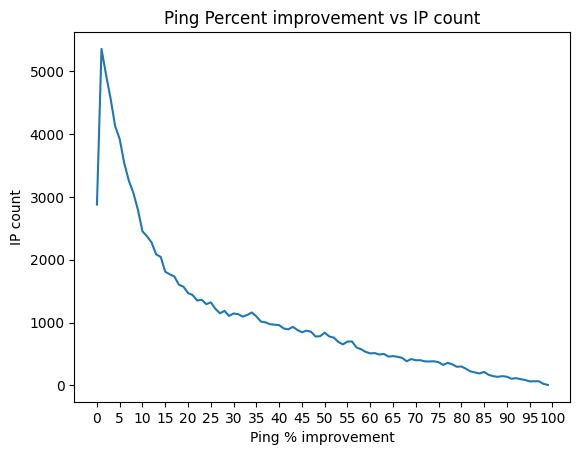

In [136]:
plt.plot(grouped.index, grouped['src_ip'])
plt.xticks(np.arange(0, 101, 5))
plt.xlabel("Ping % improvement")
plt.ylabel("IP count")
plt.title("Ping Percent improvement vs IP count")